## NLP Project: Fake News Classifier ##

- Learn the basics of NLP and classify Fake News (fake according to you!  You are lord and arbiter of truth over this model)
- Implemented in [TensorFlow](https://www.tensorflow.org)
- _2018/08/13_


#### A Note About Memory ####

- Each CoLab Session is allocated 13 GB of Memory.  For many operations, this is more than enough, however there are scenarios where we approach the limits of this available memory - e.g., Image/Video processing and very large Word Embeddings (as is the case with this Notebook).  If you should require more, then consider Google Cloud Engine (pay version) or Amazon AWS CPU or GPU instances with more memory.

In [29]:
import os
def print_memory_usage():
  tot_m, used_m, free_m, shared_m, buff_cache_m, avail_m = map(int, os.popen('free -t -m').readlines()[1].split()[1:])
  print("Total Memory (MB): {}".format(tot_m))
  print("Used Memory (MB): {}".format(used_m))
  print("Free Memory (MB): {}".format(free_m))
  print("Shared Memory (MB): {}".format(shared_m))
  print("Buff/Cache Memory (MB): {}".format(buff_cache_m))
  print("Available Memory (MB): {}".format(avail_m))
  
print_memory_usage()

Total Memory (MB): 13022
Used Memory (MB): 2705
Free Memory (MB): 888
Shared Memory (MB): 2427
Buff/Cache Memory (MB): 9429
Available Memory (MB): 8990


#### Confirm GPU ####

- Menu -> Runtime -> Change runtime type -> Hardware accelerator -> GPU -> Save
- _GPU is free for 12 hr running session. If it terminates after this time, then just restart; infinite free sessions_

In [30]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


#### Download Word Embeddings ####

#### *FastText* #### 

- Pre-trained word embeddings: 1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens): https://fasttext.cc/docs/en/english-vectors.html
- Click this Link and Add to your own Google Drive Account (_you should have 10 GB for free with any Google Account_): https://drive.google.com/open?id=1J4r1FoHwsfkePCHjzWr2T8ElYsmR9V9W . Then we will use PyDrive (see next few Cells below) to copy the 1 GB file from the Google Drive to this CoLab Notebook "sandbox"

#### *Word2Vec* ####

- Pre-trained vectors trained on part of Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases: https://code.google.com/archive/p/word2vec/
- Click this Link and Add to your own Google Drive Account (_you should have 10 GB for free with any Google Account_):  https://drive.google.com/open?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM . Then we will use PyDrive (see next few Cells below) to copy the 1.5 GB file from Google Drive to this CoLab Notebook "sandbox"

In [3]:
!pip install pydrive

    100% |████████████████████████████████| 993kB 9.7MB/s 
  Running setup.py bdist_wheel for pydrive ... - \ done
  Stored in directory: /content/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
def listGDrive():
  file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
  for file1 in file_list:
    print('title: %s, id: %s' % (file1['title'], file1['id']))
    
def saveToGDrive(filename):
  file_obj = drive.CreateFile()
  file_obj.SetContentFile(filename)
  file_obj.Upload()

In [6]:
listGDrive()

title: wiki-news-300d-1M.vec.bin, id: 1J4r1FoHwsfkePCHjzWr2T8ElYsmR9V9W
title: fake.csv, id: 1L9WgiTqNj6cXuZOBNMxLC4Z1bafx2tAu
title: image.jpeg, id: 1rRGDVhWMRkZn_92VN11teDm5gmYKsm5c
title: resnet_v1.py, id: 1_nk0KdDHa5hcYW3yuh_a8fTd9me39G3H
title: resnet_utils.py, id: 1sTcoyOZ1gC_P_zEn39HFJu1ME0PojCzU
title: east_icdar2015_resnet_v1_50_rbox.zip, id: 1awu-75Df71htBE-OiZDom58enOTqUWwn
title: PetProject-MobileNet.ipynb, id: 1RFr5mZgSZtBGv-qmGLjdG9Y7S_BFjXDB
title: petproject.pb, id: 1QGPeD29NKGviTDok1PJx_VNPsI5mdpGF
title: dataset.tar, id: 1KpZKb4O14u-dXrGNl1Wg-ekefHpDlrB0
title: FinalProject.ipynb, id: 1TVHYYt18b_tb9Rqm5CVS_vSiRJwcmpbT
title: 20180526-1.csv, id: 1UdzLGsv7L0CGMvuRenP1i032Sg8YGSwW
title: X_test.pickle, id: 1pIpV1qFVfS_T2LL7e1CnhxySshBUUYYD
title: weights-downsampled-1000-500-21-05-0.78.hdf5, id: 1MggOiet_L490SLE-wMqC2DHj-GKmVHv0
title: training_data_downsampled.pickle, id: 1nKGp0dljtb6dzE39p3MuVVD6YRVlnY9K
title: weights-1000-500-21-01-0.40.hdf5, id: 16Y03HuWAFcrrgCvUijS

In [0]:
#!wget "https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki-news-300d-1M.vec.zip"
#!unzip wiki-news-300d-1M.vec.zip
#w2v = load_w2v("wiki-news-300d-1M.vec", binary=False) 
#w2v.save_word2vec_format("wiki-news-300d-1M.vec.bin", binary=True)
#saveToGDrive("wiki-news-300d-1M.vec.bin")

In [0]:
# your 'id' value will differ, so update this accordingly
# it takes ~1 min to copy this 1.5 GB file from GDrive to this CoLab "sandbox"
#file_obj = drive.CreateFile({'id': '0B7XkCwpI5KDYNlNUTTlSS21pQmM'})
#file_obj.GetContentFile('GoogleNews-vectors-negative300.bin.gz')

# it takes ~1 min to copy this 1 GB file from GDrive to this CoLab "sandbox"
file_obj = drive.CreateFile({'id': '1J4r1FoHwsfkePCHjzWr2T8ElYsmR9V9W'})
file_obj.GetContentFile('wiki-news-300d-1M.vec.bin')  

In [32]:
ls

adc.json
datalab@
fake.csv
keras-lstm-from-scratch-embedding.h5
keras-lstm-pretrained-embedding-bidirectional-trainable.h5
keras-lstm-pretrained-embedding.h5
model_bidirectional
model_from_scratch
model_pt_frozen
model_pt_trainable
nltk_data/
sample_data/
wiki-news-300d-1M.vec.bin
wiki-news-300d-1M.vec.bin-p
wiki-news-300d-1M.vec.bin-p.vectors.npy
X_train/
X_valid/
y_train/
y_valid/


In [31]:
!pip install gensim

#### Hack Alert!  ####

- Due to Memory limitations, we need to invoke the ***init_sims(replace=True)*** method because the pre-trained Word Embeddings are too large for the available (13 GB) CoLab Session Memory.  The pre-trained model will load fine, but when we attempt to lookup words, run operations related to the embedding matrix, or train our model using it then the CoLab Runtime crashes.  
- This *DOES* impact what we can do in terms of training, because invoking that method with ***replace=True*** effectively makes the Embedding a read-only model.  We cannot *fine-tune* it while training our own dataset.
- As for ***init_sims()*** is doing, it precomputes the L2-normalized vectors, and if you use ***replace=True*** then you're instructing the model to "forget the original vectors and only keep the normalized ones = saves lots of memory" (https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.Word2VecKeyedVectors.init_sims)

In [0]:
from gensim.models import KeyedVectors
def load_w2v(filepath,binary):
  smaller_embedding = filepath+"-p"
  if os.path.exists(smaller_embedding):
    return KeyedVectors.load(smaller_embedding,mmap='r')
  else:
    w2v = KeyedVectors.load_word2vec_format(filepath, binary=binary)
    w2v.init_sims(replace=True)
    w2v.save(smaller_embedding)
    return w2v

In [34]:
# 1.5 GB; vocab=3000000; takes ~2-3 mins to load
#w2v = load_w2v("GoogleNews-vectors-negative300.bin.gz", binary=True)

# 1 GB; vocab=999994; takes ~1 min to load
w2v = load_w2v("wiki-news-300d-1M.vec.bin", binary=True) 
print(len(w2v.vocab))

999994


In [15]:
ls

adc.json  sample_data/               wiki-news-300d-1M.vec.bin-p
datalab@  wiki-news-300d-1M.vec.bin  wiki-news-300d-1M.vec.bin-p.vectors.npy


In [16]:
print_memory_usage()

Total Memory (MB): 13022
Used Memory (MB): 4129
Free Memory (MB): 178
Shared Memory (MB): 250
Buff/Cache Memory (MB): 8714
Available Memory (MB): 9900


In [17]:
# running any operation on the Word2Vec model the 1st time will take longer as it loads the Embeddings into memory
w2v.similar_by_word("politician")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('politican', 0.791045606136322),
 ('businessman', 0.7711308598518372),
 ('Politician', 0.7632097005844116),
 ('statesman', 0.7551400661468506),
 ('politicians', 0.7359908819198608),
 ('legislator', 0.731412410736084),
 ('journalist', 0.7181966304779053),
 ('diplomat', 0.7125734090805054),
 ('poltician', 0.7027260661125183),
 ('lawyer', 0.6909956336021423)]

In [18]:
# Word Embeddings even enable analogies (sometimes)!
w2v.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7515912055969238),
 ('monarch', 0.6741327047348022),
 ('princess', 0.6713887453079224)]

In [19]:
# Let's take a look at how a Word Embedding is actually represented
sample_word = w2v["the"]
print(sample_word.shape)
print(sample_word)

(300,)
[ 6.20136857e-02  1.10615278e-02 -3.94758247e-02  2.79994905e-02
 -4.81176451e-02 -8.55194330e-02  2.08094977e-02  1.71453673e-02
 -2.09477674e-02  1.20294113e-02  4.35547624e-03  1.27207562e-02
  1.50021967e-02 -1.77675784e-02  2.41970904e-02 -1.67305600e-02
  2.00490188e-03  1.29972938e-02 -3.94066907e-02  1.74219050e-02
 -1.45182544e-02 -5.53076330e-04  2.48884354e-02 -5.03990799e-02
 -4.59744744e-02  6.83740601e-02  4.67349514e-02  5.89026287e-02
 -6.15297444e-03  2.16391124e-02 -4.77028359e-03 -2.21230532e-03
 -3.19401585e-02  3.43598686e-02  1.80441160e-02  1.85280573e-02
 -2.14317087e-02 -9.40921083e-02 -4.28634183e-03  2.59254556e-02
 -2.21230555e-02 -7.32826162e-03  3.69178466e-02 -1.29281599e-02
  4.41078395e-02  6.49864692e-03  3.24932346e-03 -3.66413072e-02
  6.42951252e-03 -6.01470564e-03  2.76538165e-04  3.40833291e-02
 -4.35271084e-01  1.53478682e-02  1.31355627e-02  1.85280573e-02
 -2.94513144e-02  3.94066935e-03 -1.16353437e-01  1.68688279e-02
 -1.47256572e-02 -

In [0]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

#### Choose and Prepare your Dataset ####

- Download the [CSV](https://www.kaggle.com/mrisdal/fake-news) and upload to your Google Drive (20 MB compressed, 56 MB regular), or Add it from mine (like with the Word Embeddings): https://drive.google.com/open?id=1L9WgiTqNj6cXuZOBNMxLC4Z1bafx2tAu


- __TRY YOUR OWN DATASET !!! Collect Real and Fake News articles and "label" them as such __
- Other possibilities (I didn't try it): 
  - https://github.com/OpenSourcesGroup/opensources
  - https://www.kaggle.com/c/fake-news/data
  - https://www.kaggle.com/ciotolaaaa/snopes-fake-legit-news

In [21]:
listGDrive()

title: wiki-news-300d-1M.vec.bin, id: 1J4r1FoHwsfkePCHjzWr2T8ElYsmR9V9W
title: fake.csv, id: 1L9WgiTqNj6cXuZOBNMxLC4Z1bafx2tAu
title: image.jpeg, id: 1rRGDVhWMRkZn_92VN11teDm5gmYKsm5c
title: resnet_v1.py, id: 1_nk0KdDHa5hcYW3yuh_a8fTd9me39G3H
title: resnet_utils.py, id: 1sTcoyOZ1gC_P_zEn39HFJu1ME0PojCzU
title: east_icdar2015_resnet_v1_50_rbox.zip, id: 1awu-75Df71htBE-OiZDom58enOTqUWwn
title: PetProject-MobileNet.ipynb, id: 1RFr5mZgSZtBGv-qmGLjdG9Y7S_BFjXDB
title: petproject.pb, id: 1QGPeD29NKGviTDok1PJx_VNPsI5mdpGF
title: dataset.tar, id: 1KpZKb4O14u-dXrGNl1Wg-ekefHpDlrB0
title: FinalProject.ipynb, id: 1TVHYYt18b_tb9Rqm5CVS_vSiRJwcmpbT
title: 20180526-1.csv, id: 1UdzLGsv7L0CGMvuRenP1i032Sg8YGSwW
title: X_test.pickle, id: 1pIpV1qFVfS_T2LL7e1CnhxySshBUUYYD
title: weights-downsampled-1000-500-21-05-0.78.hdf5, id: 1MggOiet_L490SLE-wMqC2DHj-GKmVHv0
title: training_data_downsampled.pickle, id: 1nKGp0dljtb6dzE39p3MuVVD6YRVlnY9K
title: weights-1000-500-21-01-0.40.hdf5, id: 16Y03HuWAFcrrgCvUijS

In [0]:
# your 'id' value will differ, so update this accordingly
file_obj = drive.CreateFile({'id': '1L9WgiTqNj6cXuZOBNMxLC4Z1bafx2tAu'})
file_obj.GetContentFile('fake.csv') 

In [22]:
ls

adc.json  sample_data/                 wiki-news-300d-1M.vec.bin-p.vectors.npy
datalab@  wiki-news-300d-1M.vec.bin
fake.csv  wiki-news-300d-1M.vec.bin-p


In [37]:
df = pd.read_csv('fake.csv')
df.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


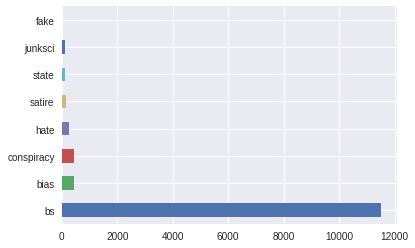

In [25]:
# Let's check out samples by type
df.type.value_counts().plot(kind='barh')

In [26]:
# It's VERY unbalanced!!
df.groupby(["type"]).size()

type
bias            443
bs            11492
conspiracy      430
fake             19
hate            246
junksci         102
satire          146
state           121
dtype: int64

In [38]:
# Let's downsample the 'bs' type
COUNT=443 # this is 2nd most value ('bias')
df_bs = df[(df['type']=='bs')].tail(COUNT)
df = df[(df["type"]!='bs')]
df = pd.concat([df, df_bs], ignore_index=True)
df.groupby(["type"]).size()

type
bias          443
bs            443
conspiracy    430
fake           19
hate          246
junksci       102
satire        146
state         121
dtype: int64

In [39]:
# drop rows with NaN for column 'text'
print(df.shape)
df.dropna(subset=['text'], inplace=True)
print(df.shape) # 46 rows dropped

(1950, 20)
(1904, 20)


In [40]:
# let's only use 'english' language articles for now
print(df.shape)
df = df[(df['language']=='english')]
print(df.shape) # 5 rows dropped

(1904, 20)
(1899, 20)


In [41]:
print(df.shape)
df['text_word_count'] = df['text'].apply(lambda xx: int(len(str(xx).split(' '))))
print(df.shape) # added a new dimension per our new column
df.head()

(1899, 20)
(1899, 21)


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_word_count
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,...,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,87
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,...,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,277
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,...,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,226
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,...,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,49
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,333


In [31]:
df['text_word_count'].describe()

count    1899.000000
mean      477.065824
std       575.407703
min         1.000000
25%       122.500000
50%       339.000000
75%       620.500000
max      7837.000000
Name: text_word_count, dtype: float64

In [42]:
# Remove upper outliers, in terms of article word count (this is for the sake of performance; dimensionality reduction)
Q1 = 122
Q3 = 620
IQR = Q3-Q1
outliers_upper = int(Q3 + 1.5*IQR)
print(outliers_upper)
df = df[(df['text_word_count'] < outliers_upper)]

1367


In [49]:
MAX_SEQUENCE_LENGTH = df['text_word_count'].max() # based on our inputs above; max count of 'text' words in this case
print(MAX_SEQUENCE_LENGTH) # 1366
MAX_NB_WORDS = len(w2v.vocab)
print(MAX_NB_WORDS) # 999994 # 3000000
EMBEDDING_DIM = w2v["the"].shape[0] #w2v=300, fastText=300; GloVe=50
print(EMBEDDING_DIM) # 300

1366
999994
300


#### Stop Words ####

"Sometimes, some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called stop words." (https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html)

In [50]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [0]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def get_stop_words():
  ''' if you want your own stop list
  path = "stop-words-list.txt"
  stop_words = []
  with codecs.open(path, "r", encoding="utf-8", errors="ignore") as myfile:
    stop_words = myfile.readlines()
  stop_words = [word.strip() for word in stop_words]
  return stop_words
  '''
  return stopwords.words('english')

def get_label(type):
  if type is "satire":
    return np.array([0, 0, 0, 0, 0, 0, 0, 1])
  elif type is "state":
    return np.array([0, 0, 0, 0, 0, 0, 1, 0])
  elif type is "junksci":
    return np.array([0, 0, 0, 0, 0, 1, 0, 0])
  elif type is "hate":
    return np.array([0, 0, 0, 0, 1, 0, 0, 0])
  elif type is "fake":
    return np.array([0, 0, 0, 1, 0, 0, 0, 0])
  elif type is "conspiracy":
    return np.array([0, 0, 1, 0, 0, 0, 0, 0])
  elif type is "bias":
    return np.array([0, 1, 0, 0, 0, 0, 0, 0])
  elif type is "bs":
    return np.array([1, 0, 0, 0, 0, 0, 0, 0])
  else: # real news
    return np.array([0, 0, 0, 0, 0, 0, 0, 0])
  
def get_text(text):
  text_words = []
  words = text.split(" ")
  stop_words = get_stop_words()
  for word in words:
    if word not in stop_words:
      text_words.append(word)
  return ' '.join(text_words)

def get_text_sequences(texts):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
  tokenizer.fit_on_texts(texts)
  sequences = tokenizer.texts_to_sequences(texts)
  word_index = tokenizer.word_index
  #print('Found %s unique tokens.' % len(word_index))
  data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
  return data, word_index
  
def get_data(df):
  texts = []
  labels = []
  texts_df = df['text'].values
  labels_df = df['type'].values
  for ii in range(len(texts_df)):
    texts.append(get_text(texts_df[ii]))
    labels.append(get_label(labels_df[ii]))
  sequences, word_index = get_text_sequences(texts)
  return sequences, np.array(labels), word_index

def get_data_encoded(df):
  texts = []
  labels = []
  texts_df = df['text'].values
  labels_df = df['type'].values
  padded_texts = []
  unknown_words = []
  for ii in range(len(texts_df)):
    word_sequences = text_to_word_sequence(texts_df[ii],
      filters='ا\n\ufeff\xa0!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t',
      lower=True,
      split=" ")
    vecs = []
    for word in word_sequences:
      stop_words = get_stop_words()
      if word not in stop_words:
        try:
          vecs.append(w2v[word])
        except KeyError:
          # TODO: incrementally update w2v with OOVs (out-of-vocabularies)
          #print("' " + str(word) + "' not in vocabulary")
          unknown_words.append(word)
      texts.append(vecs)  
      labels.append(get_label(labels_df[ii]))
  padded_vectors = sequence.pad_sequences(texts, maxlen=MAX_SEQUENCE_LENGTH)
  return np.array(padded_texts), np.array(labels), unknown_words  

In [37]:
!pip install wordcloud

    100% |████████████████████████████████| 368kB 7.7MB/s 


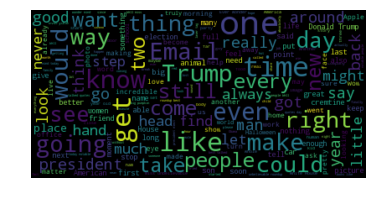

In [38]:
# Let's take a quick look at some of our dataset
from wordcloud import WordCloud
cloud_satire = WordCloud(stopwords=stopwords.words('english'), max_font_size=40
                        ).generate(" ".join(df[(df['type']=='satire')]['text'].values))
plt.imshow(cloud_satire, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
train_test_split = 0.8
df_shuffled = df.sample(frac=1)
DATA_SPLIT = int(df_shuffled.shape[0]*train_test_split)

In [54]:
X_train, y_train, word_index_train = get_data(df_shuffled[:DATA_SPLIT])
print(X_train.shape)
print(y_train.shape)
print(len(word_index_train))
X_valid, y_valid, word_index_valid = get_data(df_shuffled[DATA_SPLIT:])
print(X_valid.shape)
print(y_valid.shape)
print(len(word_index_valid))

(1428, 1366)
(1428, 8)
32239
(357, 1366)
(357, 8)
14612


In [55]:
word_index = {}
for wi in (word_index_train, word_index_valid): 
  word_index.update(wi)
print(len(word_index))

35486


In [79]:
def create_embedding_matrix(word_index):
  nb_words = min(MAX_NB_WORDS, len(word_index))+1
  embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM),dtype="float32")
  for word, ii in word_index.items():
    if word in w2v.vocab:
      embedding_matrix[ii] = w2v.word_vec(word)
  return embedding_matrix

embedding_matrix = create_embedding_matrix(word_index)
print(embedding_matrix.shape)

(35487, 300)


#### !! RUNTIME CRASH !! ####

In [0]:
X_train_enc, y_train, unk_train = get_data_encoded(df_shuffled[:DATA_SPLIT])
print(X_train_enc.shape)
print(y_train.shape)
print(len(unk_train))
X_valid_enc, y_valid, unk_valid = get_data_encoded(df_shuffled[DATA_SPLIT:])
print(X_valid_enc.shape)
print(y_valid.shape)
print(len(unk_valid))

In [0]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform

In [0]:
NUM_OUTPUTS = 8 # corresponds to the One-Hot Encodings of our labels

def get_model_pretrained_embedding(trainable=False):
    weights_filename = "keras-lstm-pretrained-embedding.h5"
    if trainable is True:
        weights_filename = "keras-lstm-pretrained-embedding-trainable.h5"
    embedding_layer = w2v.get_keras_embedding(train_embeddings=trainable)
    #print(embedding_layer.input_dim)
    #print(embedding_layer.output_dim)
    return get_model_embedding(embedding_layer), weights_filename
    
def get_model_from_scratch_embedding():
    embedding_layer = Embedding(len(word_index)+1, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)
    #print(embedding_layer.input_dim)
    #print(embedding_layer.output_dim)
    return get_model_embedding(embedding_layer), "keras-lstm-from-scratch-embedding.h5"
    
def get_model_embedding(embedding_layer):
    sentence_indices = Input(shape=(MAX_SEQUENCE_LENGTH,),dtype='int32')
    embeddings = embedding_layer(sentence_indices)   
    # Propagate the embeddings through an LSTM layer with 128-dimensional hidden state
    # Returned output should be a batch of sequences.
    X = LSTM(128, return_sequences=True)(embeddings)
    X = Dropout(0.5)(X)
    # Returned output should be a single hidden state, not a batch of sequences.
    X = LSTM(128)(X)
    X = Dropout(0.5)(X)
    X = Dense(NUM_OUTPUTS)(X)
    X = Activation('softmax')(X)
    model = Model(inputs=sentence_indices,outputs=X)
    return model  

def get_model_no_embedding():
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(MAX_SEQUENCE_LENGTH,EMBEDDING_DIM)))
    model.add(Dropout(0.5))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_OUTPUTS))
    model.add(Activation('softmax'))
    return model, "keras-lstm-no-embedding.h5"

def get_model_pretrained_embedding_bidirectional():
    sentence_indices = Input(shape=(MAX_SEQUENCE_LENGTH,),dtype='int32')
    embedding_layer = Embedding(len(word_index)+1, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True)
    embeddings = embedding_layer(sentence_indices)   
    X = Bidirectional(LSTM(60, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(embeddings)
    X = GlobalMaxPool1D()(X)
    X = Dropout(0.1)(X)
    X = Dense(50)(X)
    X = Activation("relu")(X)
    X = Dropout(0.1)(X)
    X = Dense(NUM_OUTPUTS)(X)
    X = Activation('softmax')(X)
    model = Model(inputs=sentence_indices,outputs=X)
    return model, "keras-lstm-pretrained-embedding-bidirectional-trainable.h5"

#### DIFFERENT APPROACHES #### 

 1. Learn embedding from scratch - simply add an Embedding layer to your model
 1. Fine tune learned embeddings - this involves setting word2vec / GloVe vectors as your Embedding layer's weights.
 1. Use word word2vec / Glove word vectors as inputs to your model, instead of one-hot encoding.
 
 
 - (Bidirectional) -see: https://www.kaggle.com/sbongo/do-pretrained-embeddings-give-you-the-extra-edge


In [47]:
#1
model_from_scratch, weights_from_scratch = get_model_from_scratch_embedding()
#2A
model_pt_frozen, weights_pt_frozen = get_model_pretrained_embedding()
#2B
model_pt_trainable, weights_pt_trainable = get_model_pretrained_embedding(trainable=True)
#3
#model_no_embedding, weights_no_embedding = get_model_no_embedding()
# Bidirectional
model_bidirectional, weights_bidirectional = get_model_pretrained_embedding_bidirectional()
#model.load_weights(weights_filepath)
model_bidirectional.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 1366)              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 1366, 300)         10646100  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1366, 120)         173280    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 120)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                6050      
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
__________

#### Save Datasets #### 

- Save Datasets to disk and re-open after 'Restart runtime' (workaround to free memory for training)

In [43]:
!pip install bcolz

    100% |████████████████████████████████| 1.5MB 9.0MB/s 
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz


In [0]:
import bcolz

def load_array(fname):
  return bcolz.open(fname)[:]

def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()

In [0]:
save_array('X_train',X_train)
save_array('y_train',y_train)
save_array('X_valid',X_valid)
save_array('y_valid',y_valid)

In [52]:
ls

adc.json             model_pt_trainable                       X_train/
datalab@             nltk_data/                               X_valid/
fake.csv             sample_data/                             y_train/
model_bidirectional  wiki-news-300d-1M.vec.bin                y_valid/
model_from_scratch   wiki-news-300d-1M.vec.bin-p
model_pt_frozen      wiki-news-300d-1M.vec.bin-p.vectors.npy


#### Restart Runtime ####
- Click 'Runtime' -> 'Restart runtime....'

In [2]:
import os
def print_memory_usage():
  tot_m, used_m, free_m, shared_m, buff_cache_m, avail_m = map(int, os.popen('free -t -m').readlines()[1].split()[1:])
  print("Total Memory (MB): {}".format(tot_m))
  print("Used Memory (MB): {}".format(used_m))
  print("Free Memory (MB): {}".format(free_m))
  print("Shared Memory (MB): {}".format(shared_m))
  print("Buff/Cache Memory (MB): {}".format(buff_cache_m))
  print("Available Memory (MB): {}".format(avail_m))
  
print_memory_usage()

Total Memory (MB): 13022
Used Memory (MB): 379
Free Memory (MB): 6859
Shared Memory (MB): 248
Buff/Cache Memory (MB): 5783
Available Memory (MB): 12097


#### Load Datasets ####
- Click 'Runtime' -> 'Restart runtime...'
- Re-run the Cell to 'import bcolz'
- Load the Datasets

In [0]:
X_train = load_array('X_train')
y_train = load_array('y_train')
X_valid = load_array('X_valid')
y_valid = load_array('y_valid')

In [11]:
print_memory_usage()

Total Memory (MB): 13022
Used Memory (MB): 2440
Free Memory (MB): 2333
Shared Memory (MB): 2427
Buff/Cache Memory (MB): 8248
Available Memory (MB): 9062


In [0]:
NUM_CLASSES = 8
BATCH_SIZE = 32
LSTM_UNITS = 64

In [0]:
import tensorflow as tf
tf.reset_default_graph()

input_data = tf.placeholder(tf.int32, [BATCH_SIZE, MAX_SEQUENCE_LENGTH])
labels = tf.placeholder(tf.float32, [BATCH_SIZE, NUM_CLASSES])

data = tf.Variable(tf.zeros([BATCH_SIZE, MAX_SEQUENCE_LENGTH, EMBEDDING_DIM]),dtype=tf.float32)
data = tf.nn.embedding_lookup(embedding_matrix, input_data) #wordVectors,input_data)

lstmCell = tf.contrib.rnn.BasicLSTMCell(LSTM_UNITS)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

weight = tf.Variable(tf.truncated_normal([LSTM_UNITS, NUM_CLASSES]))
bias = tf.Variable(tf.constant(0.1, shape=[NUM_CLASSES]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

correct_pred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [0]:
'''
import datetime
tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)
'''

In [0]:
def next_batch(num, data, labels):
  idx = np.arange(0 , len(data))
  np.random.shuffle(idx)
  idx = idx[:num]
  data_shuffle = [data[ii] for ii in idx]
  labels_shuffle = [labels[ii] for ii in idx]
  return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [153]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

iterations = 100000
for ii in range(iterations):
  batch_X_train, batch_y_train = next_batch(BATCH_SIZE,X_train,y_train) 
  batch_X_valid, batch_y_valid = next_batch(BATCH_SIZE,X_valid,y_valid) 
  sess.run(optimizer, {input_data: batch_X_train, labels: batch_y_train})

  if (ii % BATCH_SIZE == 0):
    train_accuracy = accuracy.eval(feed_dict={input_data: batch_X_train, labels: batch_y_train})
    valid_accuracy = accuracy.eval(feed_dict={input_data: batch_X_valid, labels: batch_y_valid})
    print('step {0}, training accuracy {1}, validation accuracy {2}'.format(ii, train_accuracy, valid_accuracy)) #, end="")

  #Save the network every 10,000 training iterations
  if (ii % 10000 == 0 and ii != 0):
    save_path = saver.save(sess, "pretrained_lstm.ckpt", global_step=ii)
    print("saved to %s" % save_path)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


step 0, training accuracy 0.0, validation accuracy 0.0
step 32, training accuracy 0.09375, validation accuracy 0.15625
step 64, training accuracy 0.09375, validation accuracy 0.09375
step 96, training accuracy 0.125, validation accuracy 0.0625
step 128, training accuracy 0.1875, validation accuracy 0.21875
step 160, training accuracy 0.125, validation accuracy 0.09375
step 192, training accuracy 0.25, validation accuracy 0.125
step 224, training accuracy 0.09375, validation accuracy 0.15625
step 256, training accuracy 0.15625, validation accuracy 0.1875
step 288, training accuracy 0.1875, validation accuracy 0.21875
step 320, training accuracy 0.0625, validation accuracy 0.1875
step 352, training accuracy 0.21875, validation accuracy 0.15625
step 384, training accuracy 0.21875, validation accuracy 0.09375


KeyboardInterrupt: ignored

In [0]:
def get_predictions(model, X_data, y_data, display=False):
    preds = np.zeros((0,2))
    labels = np.zeros((0,2))
    for ii in range(len(X_data)):
        prediction = model.predict(np.expand_dims(X_data[ii], axis=0))
        label = y_data[ii]
        preds = np.vstack((preds,prediction))
        labels = np.vstack((labels,label))
        if display is True:
            print(prediction)
            print(label)
    return preds, labels

preds, labels = get_predictions(model_bidirectional, X_data, y_data, display=True)
#preds, labels = get_predictions(model_no_embedding, X_data_enc, y_data, display=True)

[[ 0.43361151  0.56638849]]
[0 1]
[[ 0.43797344  0.56202662]]
[0 1]
[[ 0.4871538   0.51284623]]
[0 1]
[[ 0.49115032  0.50884968]]
[0 1]
[[ 0.50159067  0.49840936]]
[0 1]
[[ 0.48351571  0.51648432]]
[0 1]
[[ 0.49443078  0.50556916]]
[0 1]
[[ 0.45593712  0.54406291]]
[0 1]
[[ 0.45716313  0.54283684]]
[0 1]
[[ 0.44520226  0.55479771]]
[0 1]
[[ 0.44149619  0.55850375]]
[0 1]
[[ 0.46386287  0.53613716]]
[0 1]
[[ 0.4507618  0.5492382]]
[0 1]
[[ 0.49024183  0.50975811]]
[0 1]
[[ 0.46664053  0.53335947]]
[0 1]
[[ 0.48411196  0.51588804]]
[0 1]
[[ 0.51821077  0.48178923]]
[1 0]
[[ 0.43972757  0.56027246]]
[0 1]
[[ 0.47426388  0.52573609]]
[0 1]
[[ 0.41714111  0.58285892]]
[0 1]
[[ 0.42593279  0.57406718]]
[0 1]
[[ 0.43666127  0.56333876]]
[1 0]
[[ 0.43590912  0.56409079]]
[0 1]
[[ 0.43561319  0.56438679]]
[0 1]
[[ 0.47973943  0.52026051]]
[0 1]
[[ 0.47588331  0.52411669]]
[0 1]
[[ 0.42623574  0.57376426]]
[0 1]
[[ 0.46010175  0.53989828]]
[0 1]
[[ 0.4254297  0.5745703]]
[0 1]
[[ 0.50159067  0.4

[0 1]
[[ 0.44072333  0.5592767 ]]
[0 1]
[[ 0.4882955  0.5117045]]
[0 1]
[[ 0.45699164  0.54300833]]
[0 1]
[[ 0.48953336  0.51046664]]
[0 1]
[[ 0.48571095  0.51428908]]
[0 1]
[[ 0.44676372  0.55323631]]
[0 1]
[[ 0.46289632  0.53710371]]
[0 1]
[[ 0.4418968  0.5581032]]
[1 0]
[[ 0.47830251  0.52169746]]
[0 1]
[[ 0.41850203  0.58149797]]
[0 1]
[[ 0.49415597  0.50584406]]
[0 1]
[[ 0.49355856  0.50644147]]
[0 1]
[[ 0.42519635  0.57480359]]
[0 1]
[[ 0.4284437   0.57155633]]
[0 1]
[[ 0.46717709  0.53282297]]
[0 1]
[[ 0.44764605  0.55235398]]
[0 1]
[[ 0.44676372  0.55323631]]
[0 1]
[[ 0.43975922  0.56024075]]
[1 0]
[[ 0.49456522  0.50543475]]
[1 0]
[[ 0.4634729   0.53652704]]
[0 1]
[[ 0.45656061  0.54343939]]
[0 1]
[[ 0.47240064  0.52759939]]
[1 0]
[[ 0.47590959  0.52409041]]
[0 1]
[[ 0.4458648   0.55413526]]
[0 1]
[[ 0.47170439  0.52829564]]
[0 1]
[[ 0.50159067  0.49840936]]
[0 1]
[[ 0.47223482  0.52776527]]
[1 0]
[[ 0.49223778  0.50776219]]
[0 1]
[[ 0.45999831  0.54000169]]
[0 1]
[[ 0.4302656

[[ 0.45898774  0.54101223]]
[0 1]
[[ 0.43498111  0.56501895]]
[0 1]
[[ 0.46783352  0.53216654]]
[0 1]
[[ 0.46935496  0.53064501]]
[0 1]
[[ 0.47076625  0.52923381]]
[0 1]
[[ 0.43756971  0.56243032]]
[0 1]
[[ 0.45619521  0.54380476]]
[0 1]
[[ 0.49004981  0.50995016]]
[0 1]
[[ 0.47301233  0.52698767]]
[1 0]
[[ 0.4550077   0.54499227]]
[0 1]
[[ 0.47195199  0.52804804]]
[0 1]
[[ 0.4187642   0.58123571]]
[0 1]
[[ 0.41130325  0.58869672]]
[0 1]
[[ 0.50030977  0.49969023]]
[0 1]
[[ 0.4167954   0.58320463]]
[0 1]
[[ 0.48965871  0.51034135]]
[0 1]
[[ 0.43381453  0.56618553]]
[1 0]
[[ 0.45770463  0.54229534]]
[0 1]
[[ 0.47058684  0.5294131 ]]
[0 1]
[[ 0.43881345  0.56118649]]
[0 1]
[[ 0.44644329  0.55355674]]
[0 1]
[[ 0.43626603  0.56373399]]
[0 1]
[[ 0.45604759  0.54395241]]
[0 1]
[[ 0.46246618  0.53753376]]
[1 0]
[[ 0.43489584  0.56510413]]
[0 1]
[[ 0.46011424  0.53988576]]
[0 1]
[[ 0.46550131  0.53449869]]
[0 1]
[[ 0.43043163  0.56956834]]
[0 1]
[[ 0.45426863  0.54573137]]
[1 0]
[[ 0.47644377 

In [0]:
import itertools
import math
from sklearn.metrics import confusion_matrix

def print_statistics(cm):
    tn, fp, fn, tp = cm.ravel()
    # TP
    print("TP: " + str(tp))
    # TN
    print("TN: " + str(tn))
    # FP
    print("FP: " + str(fp))
    # FN
    print("FN: " + str(fn))
    # TPR
    recall = tp/(tp+fn)
    print("TPR/recall: " + str(recall))
    # TNR
    specificity = tn/(tn+fp)
    print("TNR/specificity: " + str(specificity))
    # PPV
    precision = tp/(tp+fp)
    print("PPV/precision: " + str(precision))
    # NPV
    npv = tn/(tn+fn)
    print("NPV/negative predictive value: " + str(npv))
    # FNR
    miss_rate = 1-recall
    print("FNR/false negative rate: " + str(miss_rate))
    # FPR
    fall_out = 1-specificity
    print("FPR/false positive rate: " + str(fall_out))
    # FDR
    fdr = 1-precision
    print("FDR/false discovery rate: " + str(fdr))
    # FOR
    fomr = 1-npv
    print("FOR/false ommission rate: " + str(fomr))
    # F1
    f1 = 2*((precision*recall)/(precision+recall))
    print("F1 score: " + str(f1))
    # accuracy
    acc = (tp+tn)/(tp+tn+fp+fn)
    print("Accuracy: " + str(acc))
    # Matthews correlation coefficient (MCC)
    mcc = (tp*tn-fp*fn)/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    print("MCC/Matthews correlation coefficient: " + str(mcc))
    # Informedness or Bookmaker Informedness (BM)
    bm = recall+specificity-1
    print("BM/Bookmaker Informedness: " + str(bm))
    # Markedness (MK)
    mk = precision+npv-1
    print("MK/Markedness: " + str(mk))
    
    return fall_out, recall

# credit: https://github.com/scikit-learn/scikit-learn/blob/master/examples/model_selection/plot_confusion_matrix.py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    s = [['TN','FP'], ['FN', 'TP']]
    #s = [['TP','FN'], ['FP', 'TN']]
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(2):
        for j in range(2):
            plt.text(j,i, (str(s[i][j])+" = "+str(format(cm[i][j],fmt))),horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

TP: 50
TN: 54
FP: 4
FN: 417
TPR/recall: 0.107066381156
TNR/specificity: 0.931034482759
PPV/precision: 0.925925925926
NPV/negative predictive value: 0.114649681529
FNR/false negative rate: 0.892933618844
FPR/false positive rate: 0.0689655172414
FDR/false discovery rate: 0.0740740740741
FOR/false ommission rate: 0.885350318471
F1 score: 0.191938579655
Accuracy: 0.198095238095
MCC/Matthews correlation coefficient: 0.0393187702999
BM/Bookmaker Informedness: 0.0381008639149
MK/Markedness: 0.0405756074546


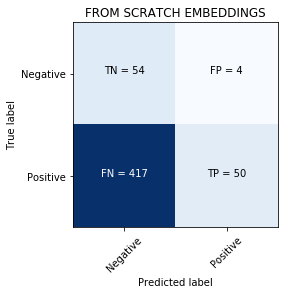

In [0]:
preds, labels = get_predictions(model_from_scratch, X_data, y_data)

y_trues = [np.argmax(ii) for ii in labels]
y_preds = [np.argmax(ii) for ii in preds]

cm = confusion_matrix(y_trues, y_preds)
fpr, tpr = print_statistics(cm)

plt.figure()
plot_confusion_matrix(cm, classes=['Negative','Positive'], title='FROM SCRATCH EMBEDDINGS')
plt.show()

TP: 1
TN: 57
FP: 1
FN: 466
TPR/recall: 0.00214132762313
TNR/specificity: 0.98275862069
PPV/precision: 0.5
NPV/negative predictive value: 0.108986615679
FNR/false negative rate: 0.997858672377
FPR/false positive rate: 0.0172413793103
FDR/false discovery rate: 0.5
FOR/false ommission rate: 0.891013384321
F1 score: 0.00426439232409
Accuracy: 0.110476190476
MCC/Matthews correlation coefficient: -0.0768395881928
BM/Bookmaker Informedness: -0.0151000516872
MK/Markedness: -0.391013384321


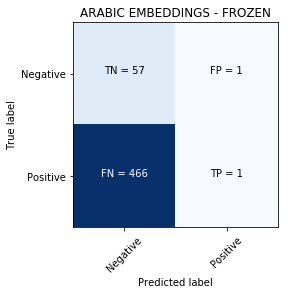

In [0]:
preds, labels = get_predictions(model_pt_frozen, X_data, y_data)

y_trues = [np.argmax(ii) for ii in labels]
y_preds = [np.argmax(ii) for ii in preds]

cm = confusion_matrix(y_trues, y_preds)
fpr, tpr = print_statistics(cm)

plt.figure()
plot_confusion_matrix(cm, classes=['Negative','Positive'], title='ARABIC EMBEDDINGS - FROZEN')
plt.show()

TP: 94
TN: 47
FP: 11
FN: 373
TPR/recall: 0.201284796574
TNR/specificity: 0.810344827586
PPV/precision: 0.895238095238
NPV/negative predictive value: 0.111904761905
FNR/false negative rate: 0.798715203426
FPR/false positive rate: 0.189655172414
FDR/false discovery rate: 0.104761904762
FOR/false ommission rate: 0.888095238095
F1 score: 0.328671328671
Accuracy: 0.268571428571
MCC/Matthews correlation coefficient: 0.00911420561544
BM/Bookmaker Informedness: 0.0116296241601
MK/Markedness: 0.00714285714286


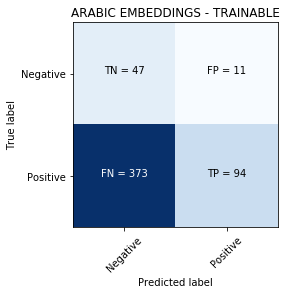

In [0]:
preds, labels = get_predictions(model_pt_trainable, X_data, y_data)

y_trues = [np.argmax(ii) for ii in labels]
y_preds = [np.argmax(ii) for ii in preds]

cm = confusion_matrix(y_trues, y_preds)
fpr, tpr = print_statistics(cm)

plt.figure()
plot_confusion_matrix(cm, classes=['Negative','Positive'], title='ARABIC EMBEDDINGS - TRAINABLE')
plt.show()

TP: 304
TN: 19
FP: 39
FN: 163
TPR/recall: 0.65096359743
TNR/specificity: 0.327586206897
PPV/precision: 0.886297376093
NPV/negative predictive value: 0.104395604396
FNR/false negative rate: 0.34903640257
FPR/false positive rate: 0.672413793103
FDR/false discovery rate: 0.113702623907
FOR/false ommission rate: 0.895604395604
F1 score: 0.750617283951
Accuracy: 0.615238095238
MCC/Matthews correlation coefficient: -0.0141293095955
BM/Bookmaker Informedness: -0.021450195673
MK/Markedness: -0.0093070195111


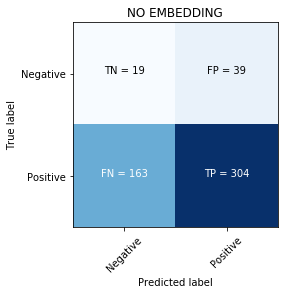

In [0]:
preds, labels = get_predictions(model_no_embedding, X_data_enc, y_data)

y_trues = [np.argmax(ii) for ii in labels]
y_preds = [np.argmax(ii) for ii in preds]

cm = confusion_matrix(y_trues, y_preds)
fpr, tpr = print_statistics(cm)

plt.figure()
plot_confusion_matrix(cm, classes=['Negative','Positive'], title='NO EMBEDDING')
plt.show()

TP: 451
TN: 3
FP: 55
FN: 16
TPR/recall: 0.96573875803
TNR/specificity: 0.051724137931
PPV/precision: 0.891304347826
NPV/negative predictive value: 0.157894736842
FNR/false negative rate: 0.03426124197
FPR/false positive rate: 0.948275862069
FDR/false discovery rate: 0.108695652174
FOR/false ommission rate: 0.842105263158
F1 score: 0.927029804728
Accuracy: 0.864761904762
MCC/Matthews correlation coefficient: 0.0293114055777
BM/Bookmaker Informedness: 0.017462895961
MK/Markedness: 0.0491990846682


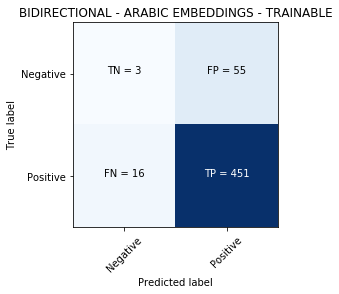

In [0]:
preds, labels = get_predictions(model_bidirectional, X_data, y_data)

y_trues = [np.argmax(ii) for ii in labels]
y_preds = [np.argmax(ii) for ii in preds]

cm = confusion_matrix(y_trues, y_preds)
fpr, tpr = print_statistics(cm)

plt.figure()
plot_confusion_matrix(cm, classes=['Negative','Positive'], title='BIDIRECTIONAL - ARABIC EMBEDDINGS - TRAINABLE')
plt.show()

TP: 5
TN: 89
FP: 11
FN: 95
TPR/recall: 0.05
TNR/specificity: 0.89
PPV/precision: 0.3125
NPV/negative predictive value: 0.483695652174
FNR/false negative rate: 0.95
FPR/false positive rate: 0.11
FDR/false discovery rate: 0.6875
FOR/false ommission rate: 0.516304347826
F1 score: 0.0862068965517
Accuracy: 0.47
MCC/Matthews correlation coefficient: -0.110581467116
BM/Bookmaker Informedness: -0.06
MK/Markedness: -0.203804347826


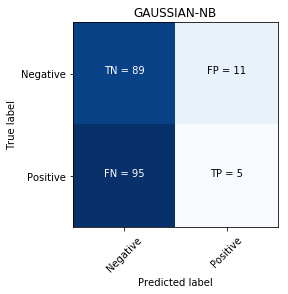

TP: 26
TN: 74
FP: 26
FN: 74
TPR/recall: 0.26
TNR/specificity: 0.74
PPV/precision: 0.5
NPV/negative predictive value: 0.5
FNR/false negative rate: 0.74
FPR/false positive rate: 0.26
FDR/false discovery rate: 0.5
FOR/false ommission rate: 0.5
F1 score: 0.342105263158
Accuracy: 0.5
MCC/Matthews correlation coefficient: 0.0
BM/Bookmaker Informedness: 0.0
MK/Markedness: 0.0


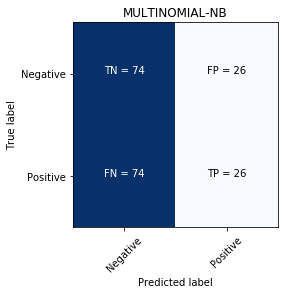

In [0]:
# requires label shape of (m,)
y_train_p = [np.argmax(ii) for ii in y_train]
y_train_p = np.array(y_train_p)
y_valid_p = [np.argmax(ii) for ii in y_valid]
y_valid_p = np.array(y_valid_p)
from sklearn.naive_bayes import GaussianNB, MultinomialNB
gnb = GaussianNB()
y_preds = gnb.fit(X_train, y_train_p).predict(X_valid)
y_trues = y_valid_p
cm = confusion_matrix(y_trues, y_preds)
fpr, tpr = print_statistics(cm)
plt.figure()
plot_confusion_matrix(cm, classes=['Negative','Positive'], title='GAUSSIAN-NB')
plt.show()
#print("GaussianNB: Number of mislabeled points out of a total %d points : %d" % (X_valid.shape[0],(y_valid != y_pred).sum()))
clf = MultinomialNB()
y_preds = clf.fit(X_train, y_train_p).predict(X_valid)
y_trues = y_valid_p
cm = confusion_matrix(y_trues, y_preds)
fpr, tpr = print_statistics(cm)
plt.figure()
plot_confusion_matrix(cm, classes=['Negative','Positive'], title='MULTINOMIAL-NB')
plt.show()
#print("MultinomialNB: Number of mislabeled points out of a total %d points : %d" % (X_valid.shape[0],(y_valid != y_pred).sum()))

#### More Information ####

__[fastText](https://fasttext.cc/)__:
 - 2016, Mikolov [1] (same person who created word2vec)
 - Learning is "fast"
 - Pre-trained word vectors via Facebook Research (https://github.com/facebookresearch/fastText/blob/master/pretrained-vectors.md)
  - Pre-trained word vectors for 294 languages, trained on Wikipedia using fastText. These vectors in dimension 300 were obtained using the skip-gram model described in __[Bojanowski et al. (2016)](https://arxiv.org/abs/1607.04606)__ with default parameters.
 
 
 1. P. Bojanowski*, E. Grave*, A. Joulin, T. Mikolov, __[Enriching Word Vectors with Subword Information](https://arxiv.org/abs/1607.04606)__
 
__[GloVe](http://nlp.stanford.edu/projects/glove/)__:
 - 2014, Stanford NLP
 
__[word2vec](https://code.google.com/archive/p/word2vec/)__:
 - 2013, Mikolov

__[How is GloVe different from word2vec?](https://www.quora.com/How-is-GloVe-different-from-word2vec)__: TL;DR
 - Perform roughtly the same function, but are built differently (Word2Vec is a "predictive" Feed-Fwd NN w/ SGD)
 - GloVe is result of Stanford NLP wanting to build on the Word2Vec concept of "semantic analogies" and yet retain "intrinsic statistical properties of the corpus" (i.e., "word occurrence statistics")

__[GloVe vs word2vec revisited.](http://dsnotes.com/post/glove-enwiki/)__: TL;DR
 - Results are similar enough (maybe GloVe is slightly more accurate)
 - Trade-off: GloVe uses A LOT of RAM/Memory (on order of 15x more!); Word2Vec is 2x slower